# Kalorimetrie Laborversuch

Author: Lucas Gomiero

Datum: 15 Dez 2023

Gruppe: 03

## Forschungsfrage

1) Welche der 3 von uns untersuchten Proben hat die größste spezifische Wärmekapazität?

## Versuchsaufbau und Durchführung

*** Disclaimer : In meiner Bearbeitung habe ich angefangen ohne die utility.py Funktion zu nutzen, weil ich die Aufgabenstellung falsche verstanden hatte. Deswegen steht bei manche mienen Aufgabenteilen die kommentierte erste Impelementation da***

Zuerst wurde die Wasser Wärmekapazität nur mithilfe von 3 Kalorimetersnesoren und ein Umgebungstemperatursensor bestimmt.

Danach wurde mit Hilfe von 3 kalorimetersensoren, ein Umgebungstemperatursensor und ein Heating Bath sensor die spezifischen Wärmekapazitäten der 3 Proben bestimmt. Die Heating Bath wurde um eine Konstante Temperatur von ungefähr 80°C gehalten, wo die 3 Proben am anfeng der Versuch eingetaucht waren.Danach wurden diese proben in ein Kalorimeter eingetauch und somit haben wir seine spezifischen Kapazitäten bestimmt. 


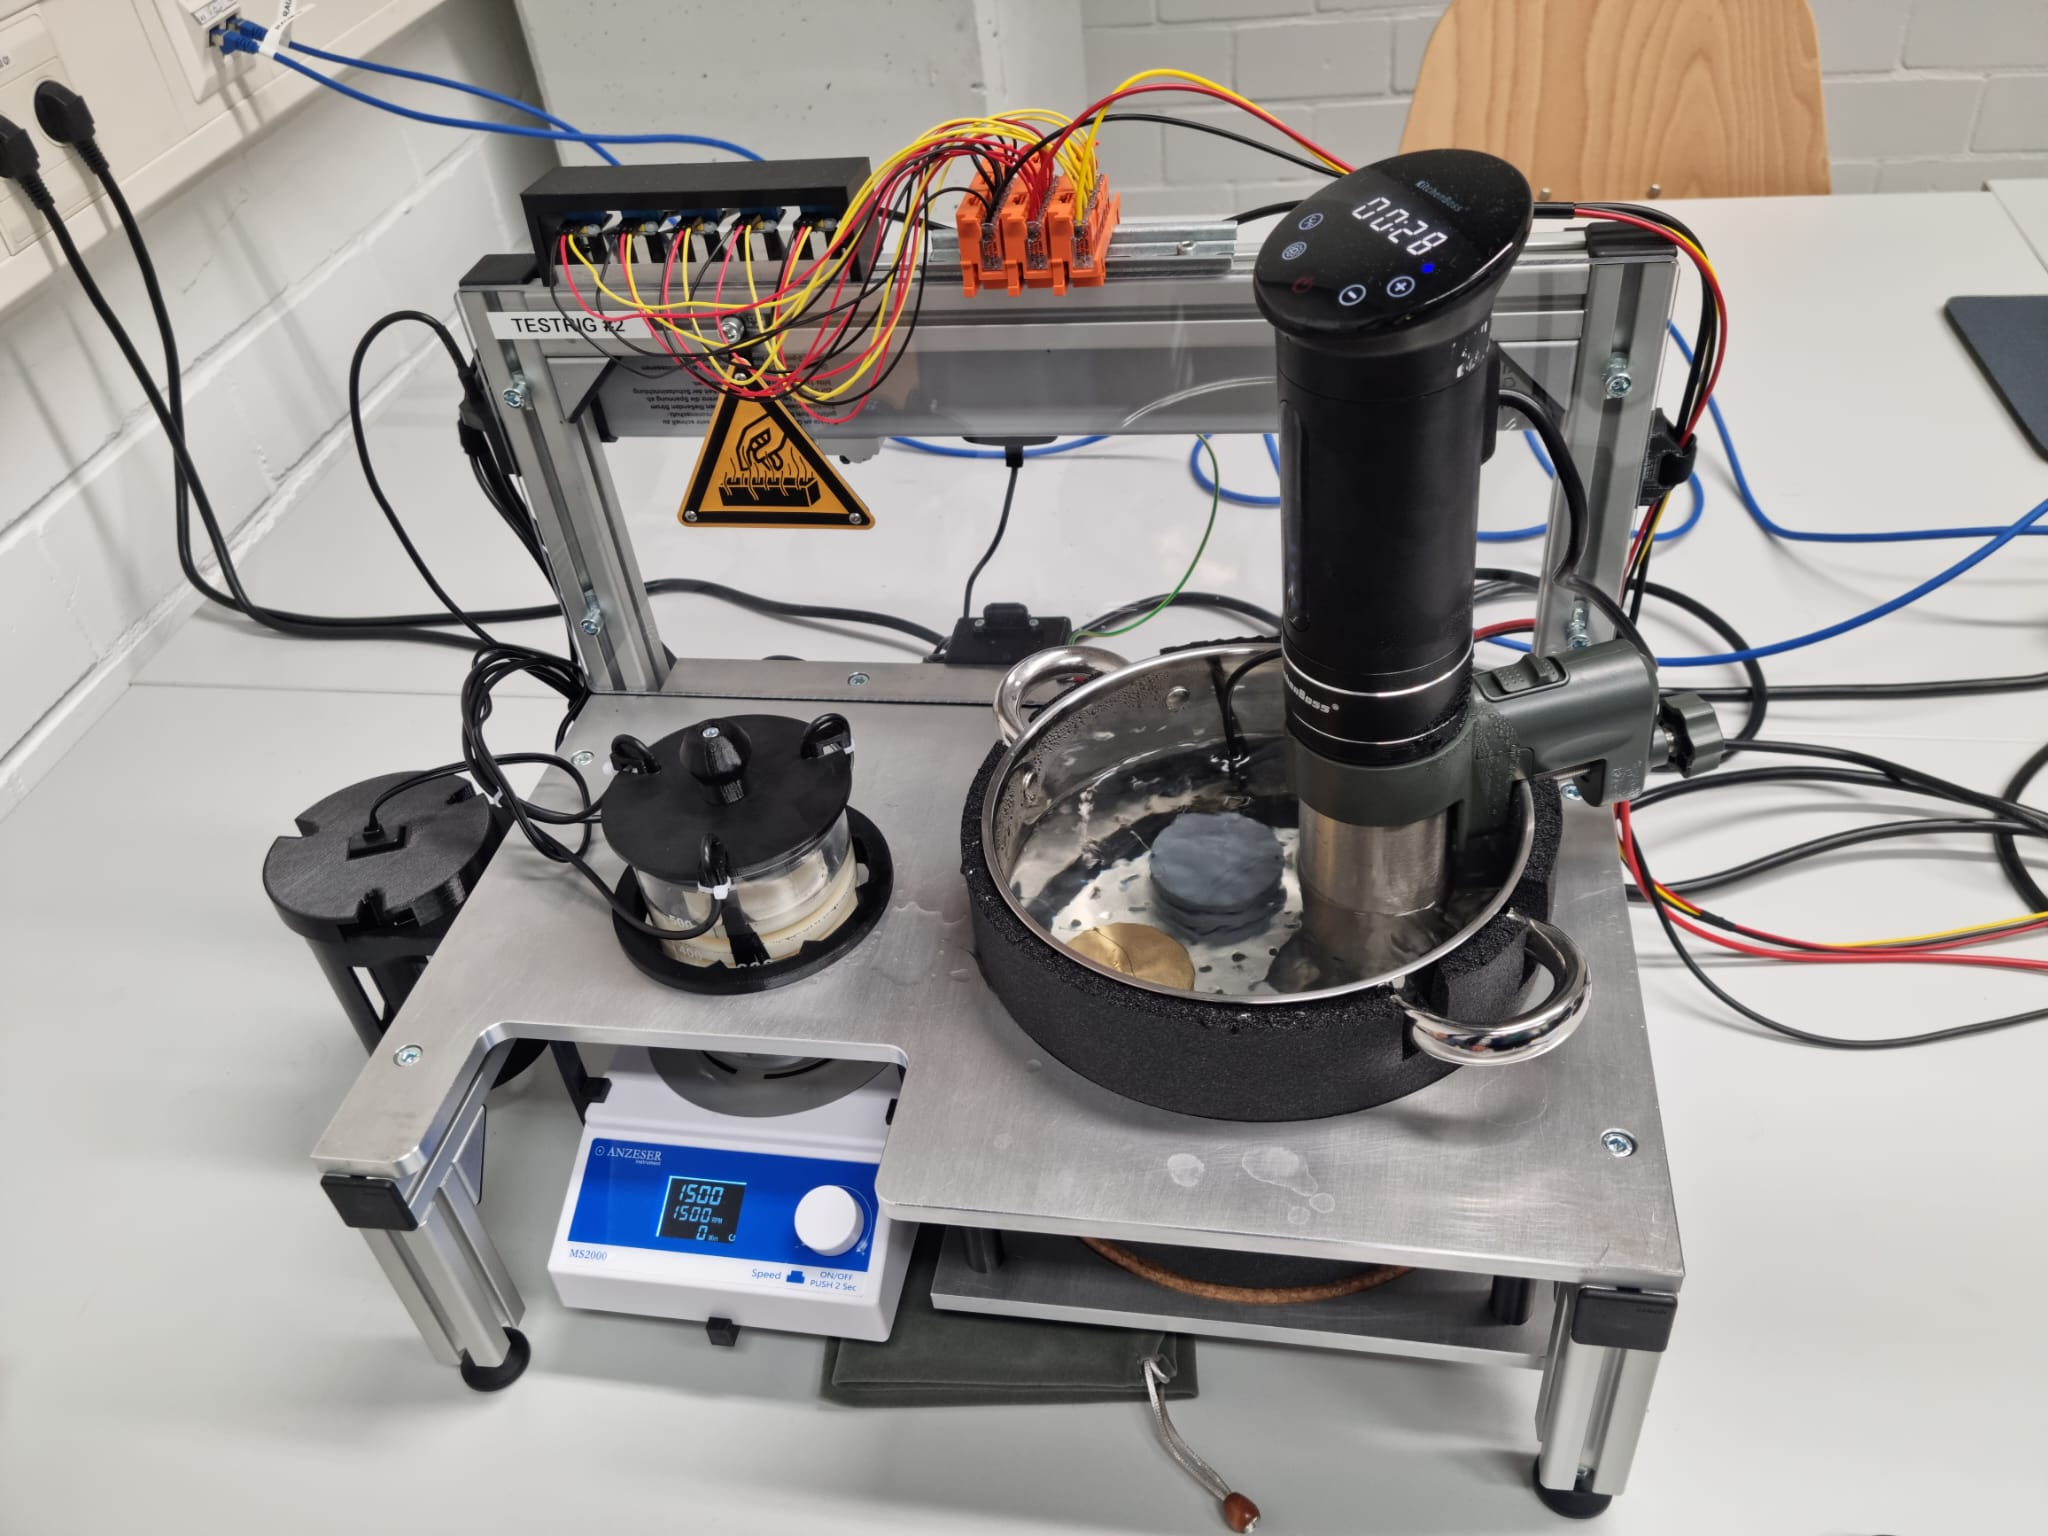


## Versuchsauswertung

In [210]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [211]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "/home/jovyan/work/calorimetry_laboratory/data/Constant versuch/Constant versuch.h5"
folder_path = "/home/jovyan/work/calorimetry_laboratory/data/Constant versuch"


# DONE #

In [212]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const,"RawData")
#print(f"The Temperatures of Sensor 1 are The following: {data_dict['Sensor 1']['Temperature']}")


#erste Implementation:

#file = h5.File(datafile_path_const,"r")

# Data aus Sensor 1 
#sensor_1_temp = file['RawData/1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde/temperature']
#sensor_1_timestamp = file['RawData/1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde/timestamp']  

# Data aus Sensor 2
#sensor_2_temp = file['RawData/1ee5ec03-7e64-6071-8ca3-98dbab0a7719/temperature']
#sensor_2_timestamp = file['RawData/1ee5ec03-7e64-6071-8ca3-98dbab0a7719/timestamp']

# Data aus Sensor 3
#sensor_3_temp = file['RawData/1ee5ec04-30cd-678f-a64b-0ce7544ef5e8/temperature']
#sensor_3_timestamp = file['RawData/1ee5ec04-30cd-678f-a64b-0ce7544ef5e8/timestamp']

# Data aus Sensor Environment
#sensor_Environment_temp = file['RawData/1ee5ec04-c845-69e2-853a-25c11543466f/temperature']
#sensor_Environment_timestamp = file['RawData/1ee5ec04-c845-69e2-853a-25c11543466f/timestamp']

# Data aus Actor Immersion Heater
#current = file['RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/current']
#heat_time = file['RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/heat_time']
#voltage = file['RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/voltage']

# Converting datasets to Numpy array(einfacher zu plotten) :

#sensor_1_temp_array = np.array(sensor_1_temp)
#sensor_1_timestamp_array = np.array(sensor_1_timestamp)

#sensor_2_temp_array = np.array(sensor_2_temp)
#sensor_2_timestamp_array = np.array(sensor_2_timestamp)

#sensor_3_temp_array = np.array(sensor_3_temp)
#sensor_3_timestamp_array = np.array(sensor_3_timestamp)

#sensor_Environment_temp_array = np.array(sensor_Environment_temp)
#sensor_Environment_timestamp_array = np.array(sensor_Environment_timestamp)

#current_array = np.array(current)
#heat_time_array = np.array(heat_time)
#voltage_array = np.array(voltage)

#data_dict = utility.get_plot_data_from_dataset()

#print(f"Size of Sensor 1 : {len(sensor_1_temp_array)}")
#print(f"Size of Sensor 2 : {len(sensor_2_temp_array)}")
#print(f"Size of Sensor 3 : {len(sensor_3_temp_array)}")
#print(f"The Current of the Immersion heater has a value of {current_array} A")
#print(f"The Heat time of the immersion heater was {heat_time_array} seconds")
#print(f"The Voltage of the Immersion Heater has a value of {voltage_array} V")

# getting Values of Anfangs- und Endtemeperaturen der Sensoren: 

# Anfangstemperaturen:
#Anfangstemperaturen = [sensor_1_temp_array[0],sensor_2_temp_array[0],sensor_3_temp_array[0]]
#print(f"Die Anfangstemperaturen der Sensoren sind : {Anfangstemperaturen}")

# Endtemperaturen:
#Endtemperaturen = [sensor_1_temp_array[-1],sensor_2_temp_array[-1],sensor_3_temp_array[-1]]
#print(f"Die Endtemperaturen der Sensoren sind : {Endtemperaturen}")



# DONE #

In [213]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0,1,2] # Index Sensor1, Sensor 2,Sensor 3
index_environment = [3] #Index Sensor Environment


# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [214]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

# calculating the mean and standard deviation of all the sensors for each measurement together: 
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])

print()

#Sensor Environment
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_environment])


#erste Implementation:

#import statistics
#import numpy as np

# Calculating the Mean of the Sensors: 
#mean_sensor_1 = statistics.mean(sensor_1_temp_array.tolist()) 
#mean_sensor_2 = statistics.mean(sensor_2_temp_array.tolist()) 
#mean_sensor_3 = statistics.mean(sensor_3_temp_array.tolist()) 
#mean_sensor_Environment = statistics.mean(sensor_Environment_temp_array.tolist())

# Calculating the Standard Deviation of the Sensors:
#stdev_sensor_1 = statistics.stdev(sensor_1_temp_array.tolist())
#stdev_sensor_2 = statistics.stdev(sensor_2_temp_array.tolist())
#stdev_sensor_3 = statistics.stdev(sensor_3_temp_array.tolist())
#stdev_sensor_Environment = statistics.stdev(sensor_Environment_temp_array.tolist())

#print(f"Mean of Sensor 1: {mean_sensor_1} \nStandard Deviation of Sensor 1: {stdev_sensor_1}")
#print("\n")
#print(f"Mean of Sensor 2: {mean_sensor_2} \nStandard Deviation of Sensor 2: {stdev_sensor_2}")
#print("\n")
#print(f"Mean of Sensor 3: {mean_sensor_3} \nStandard Deviation of Sensor 3: {stdev_sensor_3}")
#print("\n")
#print(f"Mean of Sensor Environment: {mean_sensor_Environment} \nStandard Deviation of Sensor Environment: {stdev_sensor_Environment}")


# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

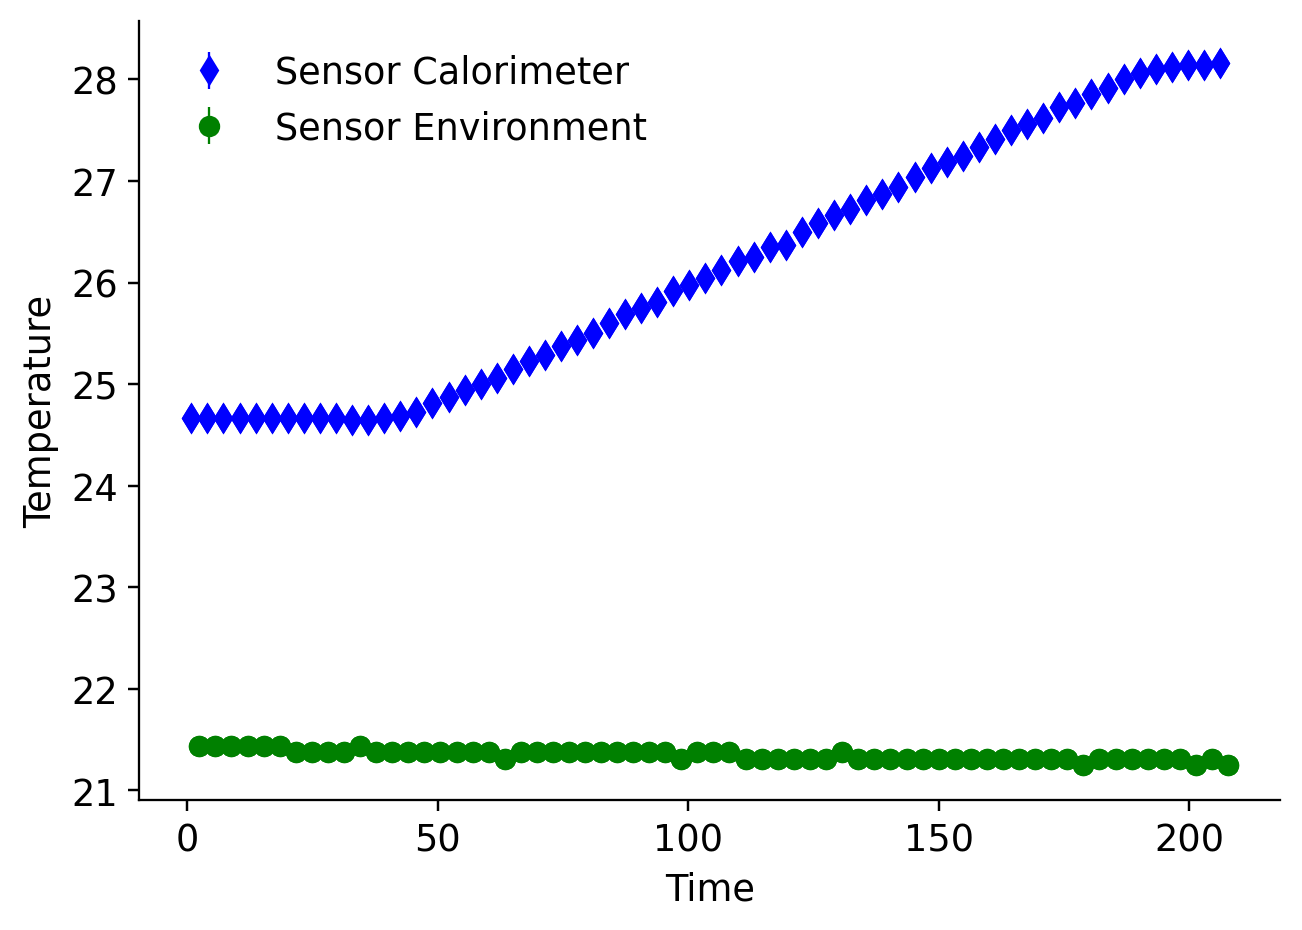

In [215]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

x_values = [data_dict['time'][1],data_dict['time'][index_environment]]
# was taken from only the sensor in the middle, tutor meinte mach das so
y_values = [mean_std_calorimeter,mean_std_environment]

utility.plot_temp_over_time(y_values,x_values,["Sensor Calorimeter","Sensor Environment"],"x label","y label")


#erste Implementation:
#import matplotlib.pyplot as plt

#x_axis = [1,2,3,4]
#y_axis = [mean_sensor_1, mean_sensor_2, mean_sensor_3, mean_sensor_Environment]
#error = [stdev_sensor_1, stdev_sensor_2, stdev_sensor_3, stdev_sensor_Environment]
#bar_labels=['Sensor 1','Sensor 2','Sensor 3','Sensor Environment']

#plt.bar(x_axis, y_axis, tick_label = bar_labels,width=0.6, color = ['red','blue','green','pink'])
#plt.errorbar(x_axis, y_axis, yerr= error, color = 'black', elinewidth = 1.6, capsize = 5, capthick = 1.6)
#plt.show()
# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [216]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.
id_water = '1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753'
path_water = "/home/jovyan/work/calorimetry_laboratory/data/Constant versuch/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json" 

water_mass = m_json.get_json_entry(folder_path,id_water,['calorimeter','medium','mass','value']) # Wert in [g]
print(f"The Water has a mass of {water_mass}g")

# DONE #

The Water has a mass of 400g


In [217]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

file = h5.File(datafile_path_const,"r")
#Data aus Actor Immersion Heater
current = file['RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/current']
heat_time = file['RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/heat_time']
voltage = file['RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/voltage']
# Converting to a np.array
current_array = np.array(current)
heat_time_array = np.array(heat_time)
voltage_array = np.array(voltage)

print(f"current = {current_array} A")
print(f"heat time = {heat_time_array} sek")
print(f"voltage = {voltage_array} V")

# DONE #

current = 4.0 A
heat time = 180.0 sek
voltage = 12.0 V


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [218]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
#print(len(data_dict["temperature"][:3]))
#print(len(data_dict["temperature"][:3]))

temperature_end, temperature_start = utility.get_start_end_temperature(data_dict["temperature"][:3],0.05) 
#Only Calculating the max and min Values from the Calorimeter Sensors

#erste Implementation:
#print(f"Die Anfangstemperaturen der Sensoren sind : {Anfangstemperaturen} in °C")
#print(f"Die Endtemperaturen der Sensoren sind : {Endtemperaturen} in °C")
# Diese Werte wurden in einer vorherigen Aufgabenteil gespeichert, in dieser Abschnitt wurden sie nur abgelesen.

# DONE #

Tuple with High and Low Temperatures: (28.25, 24.5625)


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [219]:
# TODO: Calculate heat capacity of the calorimeter
C = (voltage_array*current_array*heat_time_array) / (temperature_end - temperature_start)

#erste Implementation:
#calorimeter_const_sensor1 = (voltage*current*heat_time)/(Endtemperaturen[0]-Anfangstemperaturen[0])
#calorimeter_const_sensor2 = (voltage*current*heat_time)/(Endtemperaturen[1]-Anfangstemperaturen[1])
#calorimeter_const_sensor3 = (voltage*current*heat_time)/(Endtemperaturen[2]-Anfangstemperaturen[2])

#print(Endtemperaturen[0]-Anfangstemperaturen[0])
#print(Endtemperaturen[1]-Anfangstemperaturen[1])
#print(Endtemperaturen[2]-Anfangstemperaturen[2])

# DONE #

#### (Vii) Ergebnis

In [220]:
print(f"{C} J/°C")

2343.0508474576272 J/°C


### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [221]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "/home/jovyan/work/calorimetry_laboratory/data/Specific Probe 1/Specific Probe 1.h5"

# DONE #

In [222]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1,"RawData")

#erste Implementation:
#file = h5.File(datafile_path_prob1,"r")

# Data aus Sensor 1 
#sensor_1_temp = file['RawData/1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde/temperature']
#sensor_1_timestamp = file['RawData/1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde/timestamp']  

# Data aus Sensor 2
#sensor_2_temp = file['RawData/1ee5ec03-7e64-6071-8ca3-98dbab0a7719/temperature']
#sensor_2_timestamp = file['RawData/1ee5ec03-7e64-6071-8ca3-98dbab0a7719/timestamp']

# Data aus Sensor 3
#sensor_3_temp = file['RawData/1ee5ec04-30cd-678f-a64b-0ce7544ef5e8/temperature']
#sensor_3_timestamp = file['RawData/1ee5ec04-30cd-678f-a64b-0ce7544ef5e8/timestamp']

# Data aus Sensor Environment
#sensor_Environment_temp = file['RawData/1ee5ec04-c845-69e2-853a-25c11543466f/temperature']
#sensor_Environment_timestamp = file['RawData/1ee5ec04-c845-69e2-853a-25c11543466f/timestamp']

# Data aus Sensor Temperature Heating Bath
#sensor_heating_bath_temp = file['RawData/1ee5ec05-4aea-68f6-ad82-53b16fffae49/temperature']
#sensor_heating_bath_timestamp = file['RawData/1ee5ec05-4aea-68f6-ad82-53b16fffae49/timestamp']

# Converting datasets to Numpy array(einfacher zu plotten) :

#sensor_1_temp_array = np.array(sensor_1_temp)
#sensor_1_timestamp_array = np.array(sensor_1_timestamp)

#sensor_2_temp_array = np.array(sensor_2_temp)
#sensor_2_timestamp_array = np.array(sensor_2_timestamp)

#sensor_3_temp_array = np.array(sensor_3_temp)
#sensor_3_timestamp_array = np.array(sensor_3_timestamp)

#sensor_Environment_temp_array = np.array(sensor_Environment_temp)
#sensor_Environment_timestamp_array = np.array(sensor_Environment_timestamp)

#sensor_heating_bath_temp_array = np.array(sensor_heating_bath_temp)
#sensor_heating_bath_timestamp_array = np.array(sensor_heating_bath_timestamp)

#print(f"Size of Sensor 1 : {len(sensor_1_temp_array)}")
#print(f"Size of Sensor 2 : {len(sensor_2_temp_array)}")
#print(f"Size of Sensor 3 : {len(sensor_3_temp_array)}")
#print(f"Size of Sensor Heating Bath : {len(sensor_heating_bath_temp_array)}")

#print(sensor_1_temp_array)
#print(sensor_2_temp_array)
#print(sensor_3_temp_array)
#print(sensor_Environment_temp_array)
#print(sensor_heating_bath_temp_array)


# getting Values of Anfangs- und Endtemeperaturen der Sensoren: 

# Anfangstemperaturen:
#Anfangstemperaturen = [sensor_1_temp_array[0],sensor_2_temp_array[0],sensor_3_temp_array[0],sensor_heating_bath_temp_array[0]]
#print(f"Die Anfangstemperaturen der Sensoren sind : {Anfangstemperaturen}")

# Endtemperaturen:
#Endtemperaturen = [sensor_1_temp_array[-1],sensor_2_temp_array[-1],sensor_3_temp_array[-1],sensor_heating_bath_temp_array[-1]]
#print(f"Die Endtemperaturen der Sensoren sind : {Endtemperaturen}")

# DONE #

In [223]:

# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [224]:
#importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

#erste Implementation:
#import statistics
#import numpy as np

# Calculating the Mean of the Sensors: 
#mean_sensor_1 = statistics.mean(sensor_1_temp_array.tolist()) 
#mean_sensor_2 = statistics.mean(sensor_2_temp_array.tolist()) 
#mean_sensor_3 = statistics.mean(sensor_3_temp_array.tolist()) 
#mean_sensor_Environment = statistics.mean(sensor_Environment_temp_array.tolist())
#mean_sensor_heating_bath = statistics.mean(sensor_heating_bath_temp_array.tolist())

# Calculating the Standard Deviation of the Sensors:
#stdev_sensor_1 = statistics.stdev(sensor_1_temp_array.tolist())
#stdev_sensor_2 = statistics.stdev(sensor_2_temp_array.tolist())
#stdev_sensor_3 = statistics.stdev(sensor_3_temp_array.tolist())
#stdev_sensor_Environment = statistics.stdev(sensor_Environment_temp_array.tolist())
#stdev_sensor_heating_bath = statistics.stdev(sensor_heating_bath_temp_array.tolist())

#print(f"Mean of Sensor 1: {mean_sensor_1} \nStandard Deviation of Sensor 1: {stdev_sensor_1}")
#print("\n")
#print(f"Mean of Sensor 2: {mean_sensor_2} \nStandard Deviation of Sensor 2: {stdev_sensor_2}")
#print("\n")
#print(f"Mean of Sensor 3: {mean_sensor_3} \nStandard Deviation of Sensor 3: {stdev_sensor_3}")
#print("\n")
#print(f"Mean of Sensor Environment: {mean_sensor_Environment} \nStandard Deviation of Sensor Environment: {stdev_sensor_Environment}")
#print("\n")
#print(f"Mean of Sensor Heating Bath: {mean_sensor_heating_bath} \nStandard Deviation of Sensor Heating Bath: {stdev_sensor_heating_bath}")


# DONE #

#### (iii) Daten ploten

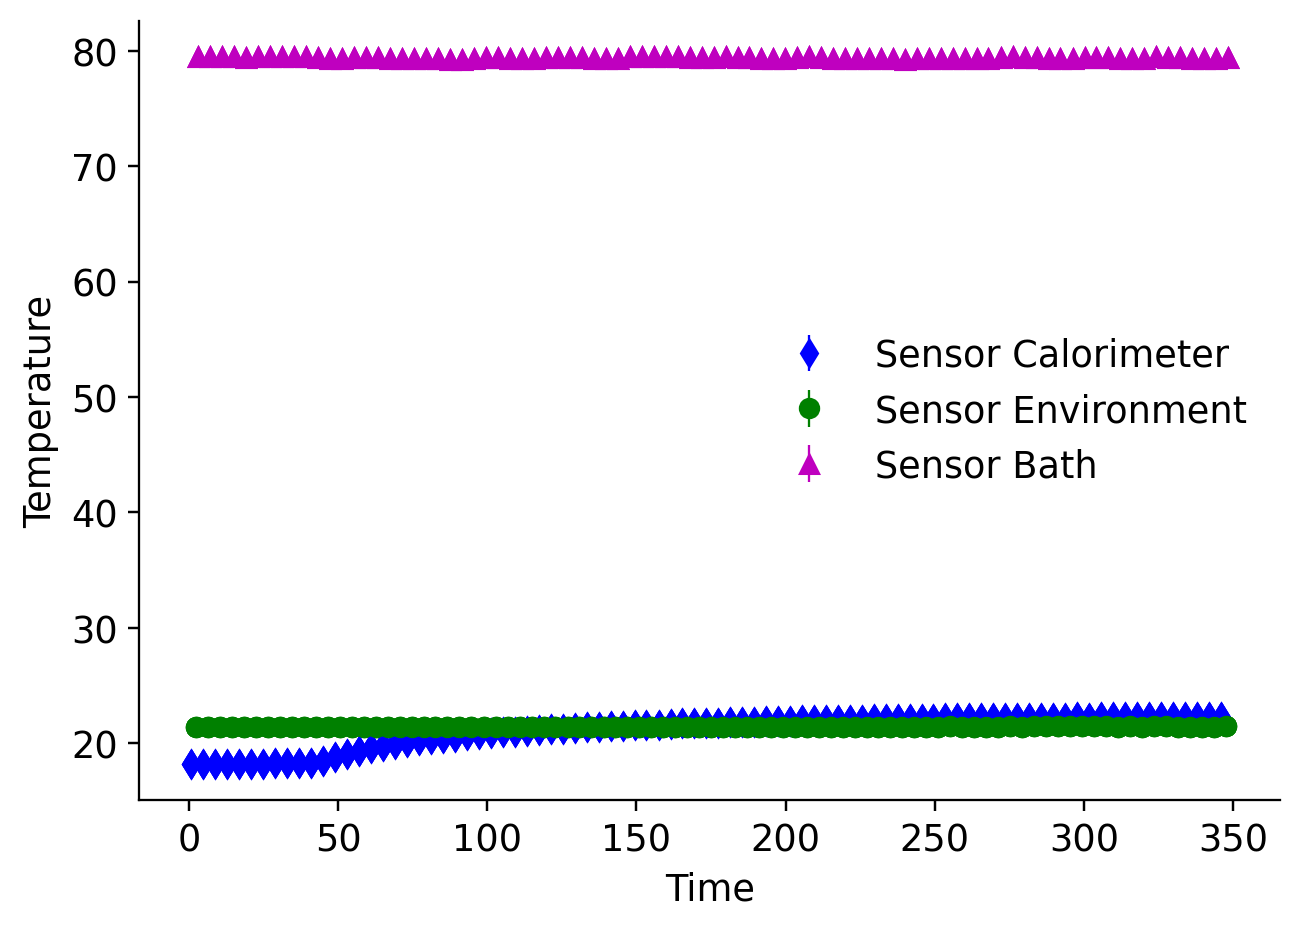

In [225]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
#print(data_dict['temperature'])
#print()
#print(data_dict['time'])
#print(data_dict['temperature'][1])



x_values = [data_dict['time'][1],data_dict['time'][index_env],data_dict['time'][index_bath]]
# was taken from only the sensor calorimeter in the middle, tutor meinte mach das so
y_values = [mean_std_calorimeter,mean_std_environment,mean_std_heater]


utility.plot_temp_over_time(y_values,x_values,["Sensor Calorimeter","Sensor Environment","Sensor Bath"],"x label","y label")

#erste Implementation:
#import matplotlib.pyplot as plt

#x_axis = [1,2,3,4,5]
#y_axis = [mean_sensor_1, mean_sensor_2, mean_sensor_3, mean_sensor_Environment, mean_sensor_heating_bath]
#error = [stdev_sensor_1, stdev_sensor_2, stdev_sensor_3, stdev_sensor_Environment, stdev_sensor_heating_bath]
#bar_labels=['Sensor 1','Sensor 2','Sensor 3','Sensor Environment','Sensor Heating Bath']

#plt.bar(x_axis, y_axis, tick_label = bar_labels,width=0.3, color = ['red','blue','green','pink','orange'])
#plt.errorbar(x_axis, y_axis, yerr= error, color = 'black', elinewidth = 1.6, capsize = 5, capthick = 1.6)
#plt.tight_layout()
#plt.xticks(rotation=30, ha="right")
#plt.show()


# DONE #

#### (iv) Metadaten auslesen

In [226]:
# TODO: Read mass of the sample from the metadata of the experiment.

id_sample = '1ee57b36-18e3-6dbc-a7dc-7a8460286908'
#path_sample = "/home/jovyan/work/calorimetry_laboratory/data/Specific Probe 1/probe_PDC010_1ee57b36-18e3-6dbc-a7dc-7a8460286908.json"
folder_path_probe1 = folder_path = "/home/jovyan/work/calorimetry_laboratory/data/Specific Probe 1"

sample_mass = m_json.get_json_entry(folder_path,id_sample,['probe','mass','value']) # Wert in [g]
print(f"The mass of the Sample 1 is {sample_mass}g")

# DONE #

The mass of the Sample 1 is 110g


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [227]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
#print(data_dict['temperature'])
#print()

#temperature_mix, temperature_start_water = utility.get_start_end_temperature() 

# my way:
Tm = data_dict['temperature'][1][-1]
#calculates the temperature at the end of the array
T1 = data_dict['temperature'][1][0]

print(f"Tm = {Tm}°C")
print(f"Temperature start water = {T1}°C")

# DONE #

Tm = 22.25°C
Temperature start water = 18.1875°C


In [228]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

#with the average of the first 10 entries:
T2 = np.mean(data_dict['temperature'][4][:10])
# initial temperature of the Sample

print(f"The initial Temperature of the Sample is {T_initial_sample}°C")


#erste Implementation:
#import statistics

#Taking the Average of the 10 initial Temperature Values for each Sensor:
#temperature_start_sample_sensor_1 = statistics.mean(sensor_1_temp_array[:10])
#temperature_start_sample_sensor_2 = statistics.mean(sensor_2_temp_array[:10])
#temperature_start_sample_sensor_3 = statistics.mean(sensor_3_temp_array[:10])

# Determining the Mischungstemperatur and the Final Temperature Value for each Sensor:

#T1 = Temperatur Anfang in Calorimeter
#T2 = Temperatur Anfang der Wasser
#Tm = Mischungstemperatur am Ende der Versuch

#T1_sensor_1 = Anfangstemperaturen[0]
#T1_sensor_2 = Anfangstemperaturen[1]
#T1_sensor_3 = Anfangstemperaturen[2]

#T2 = Anfangstemperaturen[3]

#print(f"Initial Temperature Value of Sample according to Sensor 1 = {temperature_start_sample_sensor_1} °C")
#print(f"Initial Temperature Value of Sample according to Sensor 2 = {temperature_start_sample_sensor_2} °C")
#print(f"Initial Temperature Value of Sample according to Sensor 3 = {temperature_start_sample_sensor_3} °C")
#print(f"Initial Temperature Value of Water Temperature = {T2} °C")

# DONE #

The initial Temperature of the Sample is 79.45625°C


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [229]:
# TODO: Calulate specific heat capacity of the sample.
#T1 ist Anfangstemperatur Wasser im Kalorimeter
#T2 ist Anfangstemperatur der Probe(heating Bath)
#Tm ist 
cp = (C*(Tm - T1)) / (sample_mass*(T2 - Tm))

# DONE #

#### (Vii) Ergebnis

In [230]:
print(f"Die spezifische Wärmekapazität von Probe 1 beträgt {cp} J/g*K")

Die spezifische Wärmekapazität von Probe 1 beträgt 1.5126516401452657 J/g*K


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [231]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
'''ANMERKUNG : Leider haben wir nach unserer Experiment festgestellt, dass wir die Dateien der Zweite Probe 
falsch gespeichert haben und ich konnte die Dateien nicht finden. Alles was ich gemacht habe steht hier als 
kommentar. Aber ich würde wie die Andere zwei Proben machen.'''

#datafile_path_prob2 = "/home/jovyan/work/calorimetry_laboratory/data/Specific Probe 2/Specific Probe 2.h5"

# DONE #

'ANMERKUNG : Leider haben wir nach unserer Experiment festgestellt, dass wir die Dateien der Zweite Probe \nfalsch gespeichert haben und ich konnte die Dateien nicht finden. Alles was ich gemacht habe steht hier als \nkommentar. Aber ich würde wie die Andere zwei Proben machen.'

In [232]:
#importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

#data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2,"RawData")

# DONE #

In [233]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

#index_calorimeter = [0,1,2]
#index_bath = [4]
#index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [234]:
#importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

#mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
#mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
#mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

# DONE #

#### (iii) Daten ploten

In [235]:
#importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

#x_values = [data_dict['time'][1],data_dict['time'][index_env],data_dict['time'][index_bath]]
# was taken from only the sensor calorimeter in the middle, tutor meinte mach das so
#y_values = [mean_std_calorimeter,mean_std_environment,mean_std_heater]


#utility.plot_temp_over_time(y_values,x_values,["Sensor Calorimeter","Sensor Environment","Sensor Bath"],"x label","y label")

# DONE #

#### (iv) Metadaten auslesen

In [236]:
# TODO: Read mass of the sample from the metadata of the experiment.

#id_sample = '1ee7d442-8357-6cc1-96ec-9a7793486abc'
#folder_path = "/home/jovyan/work/calorimetry_laboratory/data/Specific Probe 2"

#sample_mass = m_json.get_json_entry(folder_path,id_sample,['probe','mass','value']) # Wert in [g]
#print(f"The mass of the Sample 1 is {sample_mass} g")

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [237]:
#importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

#temperature_mix, temperature_start_water = utility.get_start_end_temperature() 

# my Way:
#Tm = data_dict['temperature'][1][-1]
#calculates the temperature at the end of the array
#T1 = data_dict['temperature'][1][0]

#print(f"Tm = {Tm}°C")
#print(f"Temperature start water = {T1}°C")


# DONE #

In [238]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

#with the average of the first 10 entries:
#T2 = np.mean(data_dict['temperature'][4][:10])
# initial temperature of the Sample

#print(f"The initial Temperature of the Sample is {T_initial_sample}°C")

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [239]:
# TODO: Calulate specific heat capacity of the sample.

#sample_heat_capa = (C*(Tm - T1)) / (sample_mass*(T2 - Tm))

# DONE #

#### (Vii) Ergebnis

In [240]:
#print(f"Die spezifische Wärmekapazität von Probe 2 beträgt {sample_heat_capa} J/g*K")

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [241]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "/home/jovyan/work/calorimetry_laboratory/data/Specific Probe 3/Specific Probe 3.h5"

# DONE #

In [242]:
#importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3,"RawData")

# DONE #

In [243]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [244]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

# DONE #

#### (iii) Daten ploten

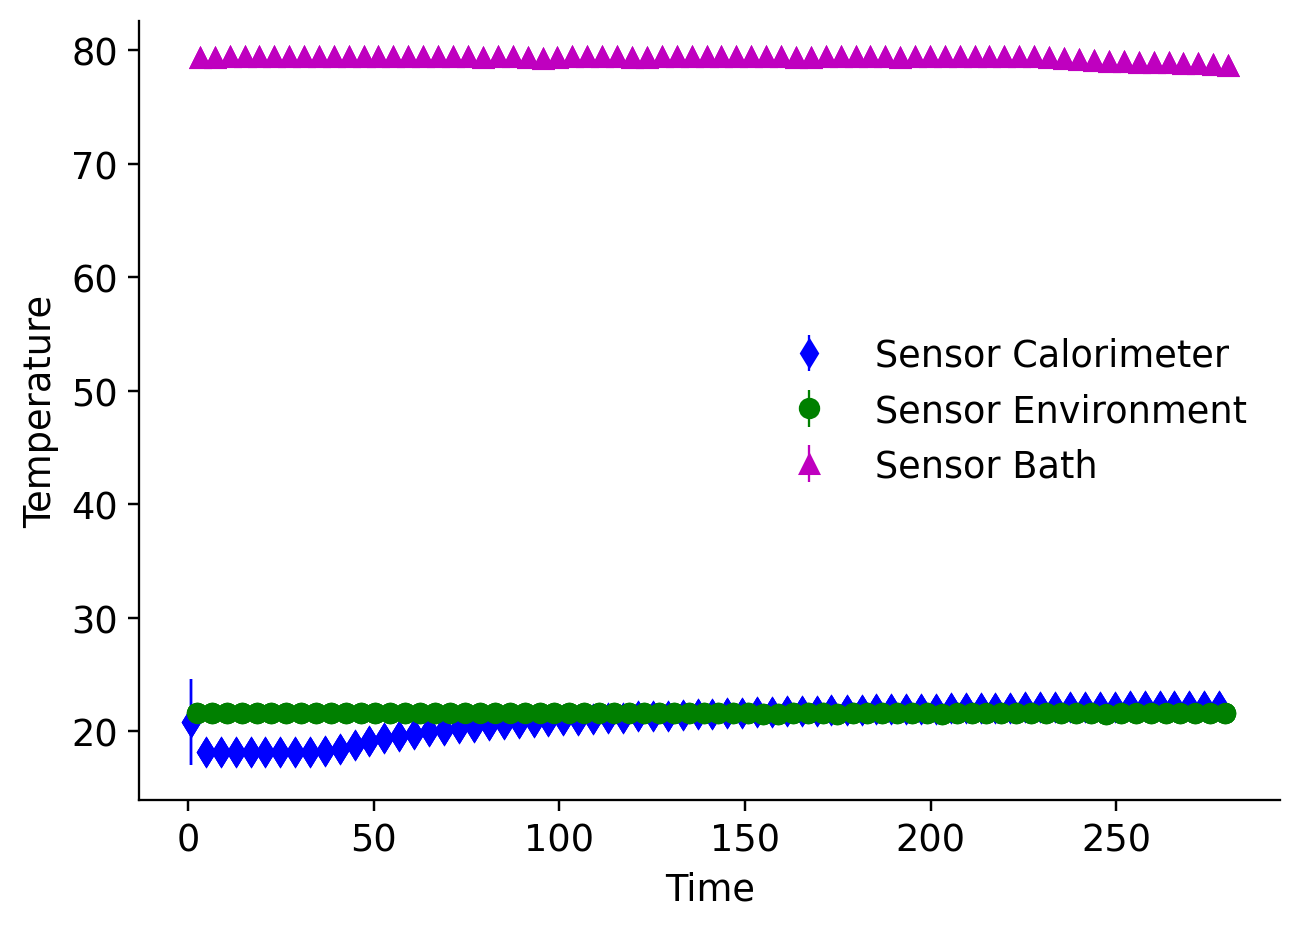

In [245]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
x_values = [data_dict['time'][1],data_dict['time'][index_env],data_dict['time'][index_bath]]
# was taken from only the sensor calorimeter in the middle, tutor meinte mach das so
y_values = [mean_std_calorimeter,mean_std_environment,mean_std_heater]


utility.plot_temp_over_time(y_values,x_values,["Sensor Calorimeter","Sensor Environment","Sensor Bath"],"x label","y label")


# DONE #

#### (iv) Metadaten auslesen

In [246]:
# TODO: Read mass of the sample from the metadata of the experiment.

id_sample = '1ee7d442-8357-6cc1-96ec-9a7793486abc'
folder_path = "/home/jovyan/work/calorimetry_laboratory/data/Specific Probe 3"

sample_mass = m_json.get_json_entry(folder_path,id_sample,['probe','mass','value']) # Wert in [g]
print(f"The mass of the Sample 1 is {sample_mass}g")

# DONE #

The mass of the Sample 1 is 85g


#### (v) Anfangs- und Endwert der Temperatur

In [247]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

#temperature_mix, temperature_start_water = utility.get_start_end_temperature() 

#my Way:
Tm = data_dict['temperature'][1][-1]
#calculates the temperature at the end of the array
T1 = data_dict['temperature'][1][0]
#print(data_dict['temperature'][1])
print(f"Tm = {Tm}°C")
print(f"Temperature start water = {T1}°C")


# DONE #

Tm = 22.1875°C
Temperature start water = 18.1875°C


In [248]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

#with the average of the first 10 entries:
T2 = np.mean(data_dict['temperature'][4][:10])
# initial temperature of the Sample
#print(data_dict['temperature'][4][:10])
print(f"The initial Temperature of the Sample is {T_initial_sample}°C")

# DONE #

The initial Temperature of the Sample is 79.45625°C


#### (vi) spezifische Wärmekapazität bestimmen

In [249]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (C*(Tm - T1)) / (sample_mass*(T2 - Tm))

# DONE #

#### (Vii) Ergebnis

In [250]:
print(f"Die spezifische Wärmekapazität von Probe 3 ist {sample_heat_capa} J/g*K")

Die spezifische Wärmekapazität von Probe 3 ist 1.9278542909137306 J/g*K


## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

1) ABS hat eine größere spezifische Wärmekapazität als PVC.

2) Wir haben die Proben fast ohne von Heating Bath bleibende Wassermenge transportiert, deswegen sollte das kein Einfluss auf unsere Messungen und Ergebnis gehabt haben.

3) Was noch unsere Ergebnisse beeinflussen könnte sind unsere geringe Laborerfahrung, die Messgenauigkeit der Sensoren, die Isolierung der Kalorimeter und die Qualität der Proben. Ehrlich gesagt, vielleicht haben wir auch falsch gemessen und wir wissen es noch nicht.


## Fazit
Aus dem Versuch haben wir gelernt, dass man immer zweimal überpfrüfen muss, ob alle Messungen richtig gespeichert wurden oder nicht. In unsere Versuch wurden leider die Daten der 2 Probe nicht richtig gespeichert, deswegen sind die zu implementierende Funktionen als kommentar geschrieben.

PS : In meiner bearbeitung habe ich angefangen ohne die utility.py funktion zu nutzen, weil ich die Aufgabenstellung falsche verstanden hatte. Deswegen steht bei manche mienen aufgabenteilen die kommentierte erste Impelementation da